# Part 1: comparing tax rates of the 2 groups

in my original project I used a very amature approach to determine if queer communities paid more or fewer taxes comapred to the general population - I did this improperly using data vizualization techniques

//add images

in this section I will attempt to use regression methods to not only determine correlation & comparison - but also to compare insights in other parameters of the groups

In [1]:
# starting out with data cleaning

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

gaybourhoods = pd.read_csv("data/gaybourhoods.csv")
# gaybourhoods.head(5)

## take the dataset & add long/lat
## props to Nat for creating the backbone I used to zipcode -> long/lat

cords = pd.read_csv("data/zip_lat_long.csv")
gaydf = pd.read_csv("data/tax_and_gay.csv")

gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")
del gaydf['zip.1']
del gaydf['ZIP']

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

                zip     population  gay tax rate  overall tax paid  income  \
count   2184.000000    2184.000000   2184.000000       2184.000000  2184.0   
mean   48935.203297   26691.730769   4373.997253        596.719322     1.0   
std    35451.335807   17960.713867   3054.620840        615.174358     0.0   
min     1730.000000     160.000000      0.000000          0.000000     1.0   
25%    11360.750000   13337.500000   2110.000000        217.000000     1.0   
50%    60023.500000   24070.000000   3900.000000        434.000000     1.0   
75%    80227.250000   35640.000000   5902.500000        777.250000     1.0   
max    98686.000000  114420.000000  24560.000000       9166.000000     1.0   

               lat         long  
count  2184.000000  2184.000000  
mean     38.016518   -91.296804  
std       5.210272    18.476699  
min      25.572213  -123.118977  
25%      33.997027  -105.037767  
50%      39.930150   -87.603617  
75%      40.960828   -74.310179  
max      47.916786   -70.

in the original project I began with a few plots

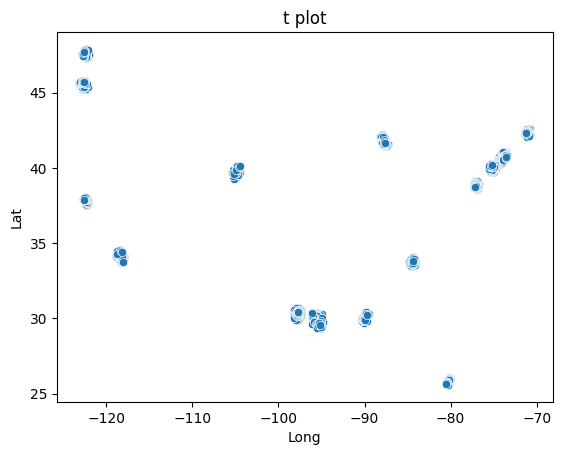

In [2]:
plot1 = sns.scatterplot(data=gaydf, x="long", y="lat"); _ = plot1.set(xlabel="Long", ylabel="Lat", title="t plot")

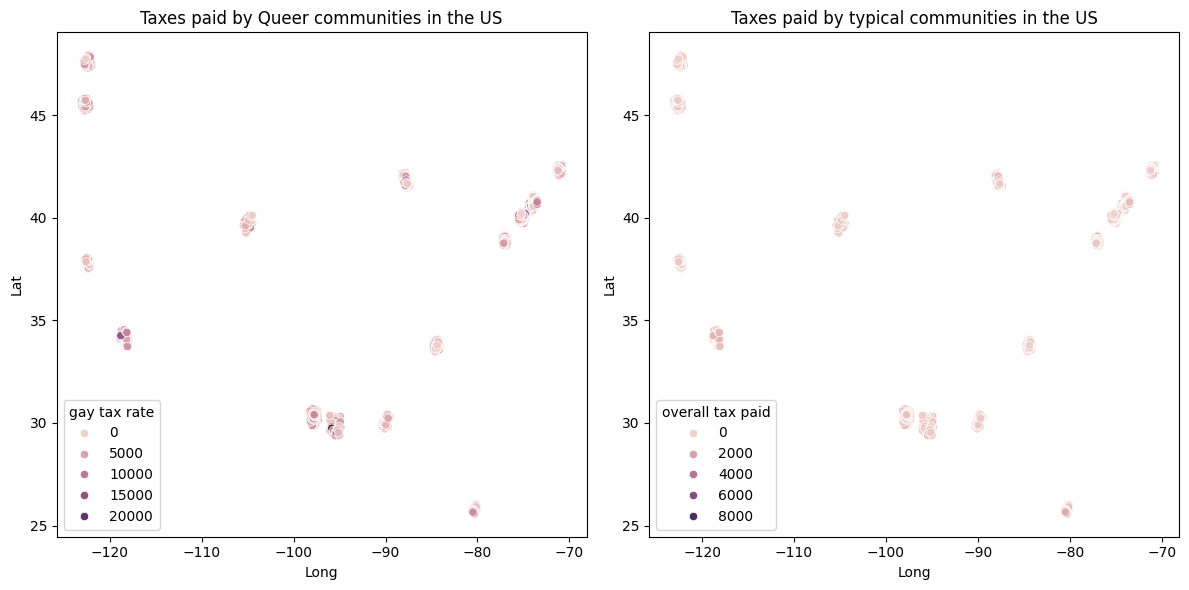

In [3]:
gaydfgaytaxplot = gaydf.copy(); gaydfgentaxplot = gaydf.copy()

del gaydfgaytaxplot['zip']; del gaydfgaytaxplot['population']; del gaydfgaytaxplot['overall tax paid']; del gaydfgaytaxplot['income']

del gaydfgentaxplot['zip']; del gaydfgentaxplot['population']; del gaydfgentaxplot['income']

plt.figure(figsize=(12, 6));    plt.subplot(1, 2, 1)
plot1 = sns.scatterplot(data=gaydfgaytaxplot, x="long", y="lat", hue='gay tax rate')
_ = plot1.set(xlabel="Long", ylabel="Lat", title="Taxes paid by Queer communities in the US")

plt.subplot(1, 2, 2)
plot2 = sns.scatterplot(data=gaydfgentaxplot, x="long", y="lat", hue='overall tax paid')
_ = plot2.set(xlabel="Long", ylabel="Lat", title="Taxes paid by typical communities in the US")

plt.tight_layout();     plt.show()

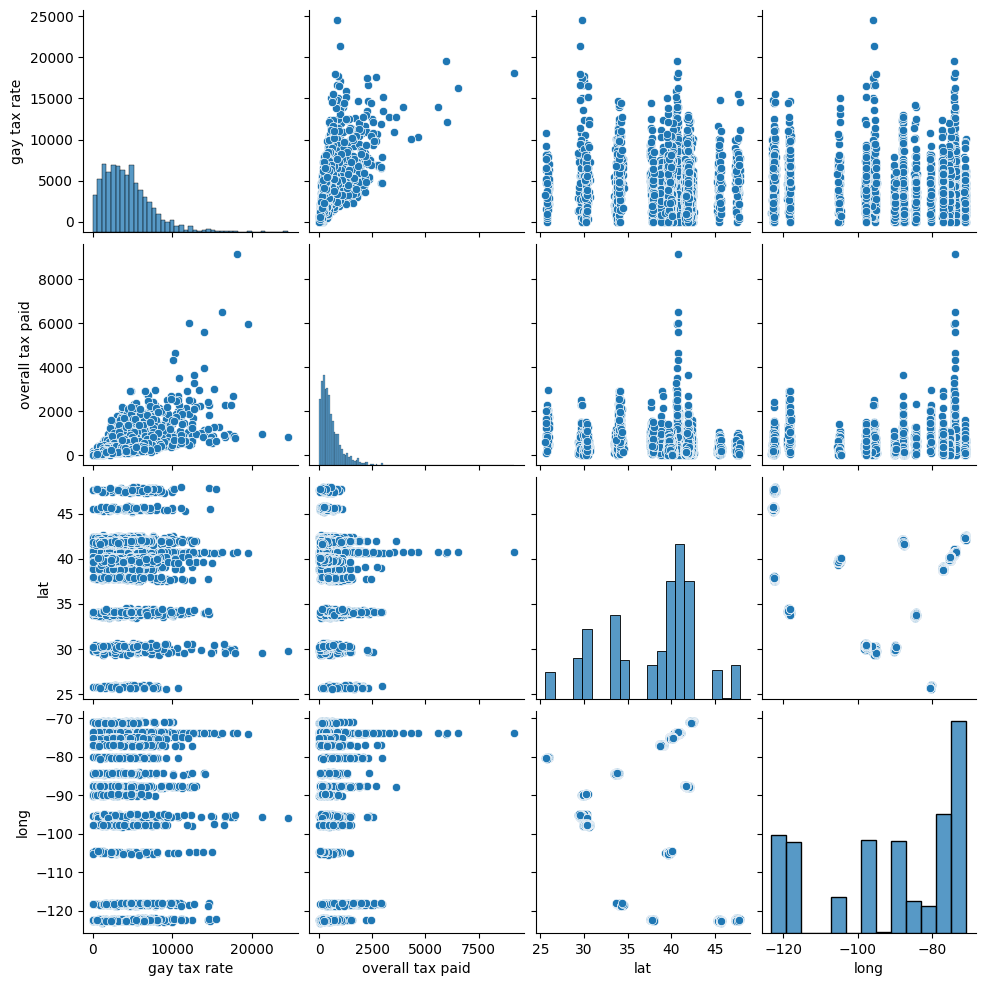

In [4]:
gaydfhybridplot = pd.merge(gaydfgentaxplot, gaydfgaytaxplot); sns.pairplot(gaydfhybridplot)

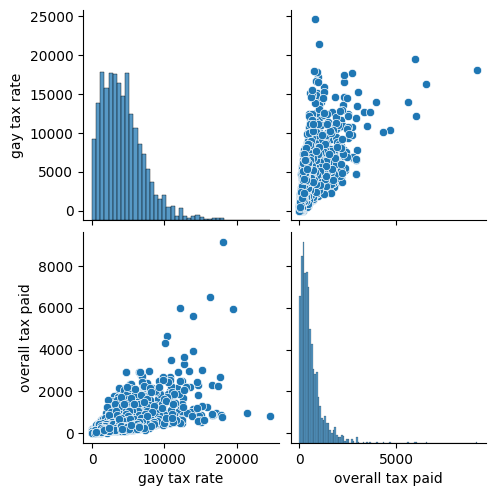

In [5]:
gaydflight = gaydfhybridplot.copy(); del gaydflight['lat']; del gaydflight['long']; sns.pairplot(gaydflight)

The first thing I noticed looking back at it was all I observed during the first pass was a simple ratio - so to start off the more in depth analysis im going to make a line plot to visualize the distribution

In [6]:
gaydf['gaytax per income'] = gaydf['gay tax rate'] / gaydf['income']
gaydf['overalltax per income'] = gaydf['overall tax paid'] / gaydf['income']

print(gaydf)
print("--------")
print(gaydf.columns)

        zip  population  gay tax rate  overall tax paid  income        lat  \
0      1730     13570.0          3260             150.0       1  42.499295   
1      1731      2450.0           550               0.0       1  42.456748   
2      1742     17170.0          4220             297.0       1  42.462911   
3      1760     34350.0          7880             468.0       1  42.284822   
4      1770      4310.0          1060              46.0       1  42.231947   
...     ...         ...           ...               ...     ...        ...   
2179  98682     57010.0         11080             703.0       1  45.673209   
2180  98683     30700.0          6470             358.0       1  45.603287   
2181  98684     27630.0          5390             371.0       1  45.630556   
2182  98685     27540.0          6490             298.0       1  45.715211   
2183  98686     17800.0          4120             215.0       1  45.723392   

            long  gaytax per income  overalltax per income  
0 

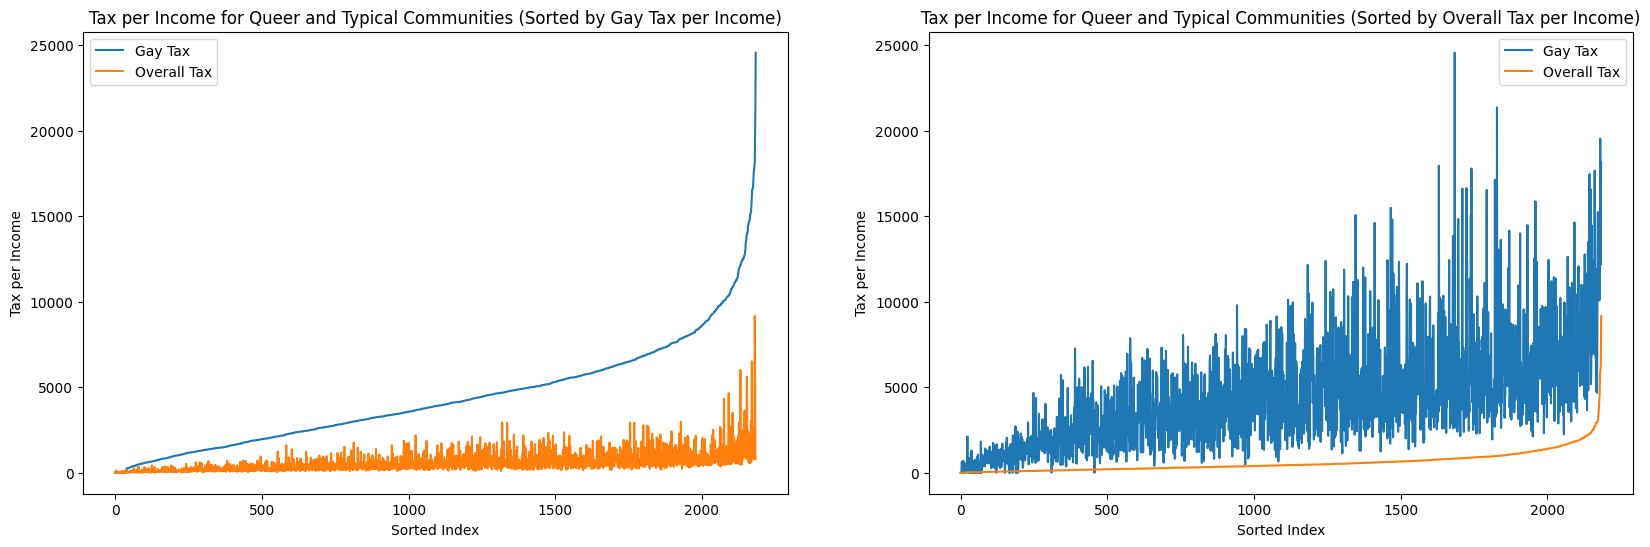

In [7]:
sorted_gaydf = gaydf.sort_values(by='gaytax per income');   sorted_gendf = gaydf.sort_values(by='overalltax per income')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.lineplot(data=sorted_gaydf, x=range(len(sorted_gaydf)), y='gaytax per income', label='Gay Tax', ax=axes[0])
sns.lineplot(data=sorted_gaydf, x=range(len(sorted_gaydf)), y='overalltax per income', label='Overall Tax', ax=axes[0])
axes[0].set(xlabel='Sorted Index', ylabel='Tax per Income', title='Tax per Income for Queer and Typical Communities (Sorted by Gay Tax per Income)')

sns.lineplot(data=sorted_gendf, x=range(len(sorted_gendf)), y='gaytax per income', label='Gay Tax', ax=axes[1])
sns.lineplot(data=sorted_gendf, x=range(len(sorted_gendf)), y='overalltax per income', label='Overall Tax', ax=axes[1])
axes[1].set(xlabel='Sorted Index', ylabel='Tax per Income', title='Tax per Income for Queer and Typical Communities (Sorted by Overall Tax per Income)')

plt.show()

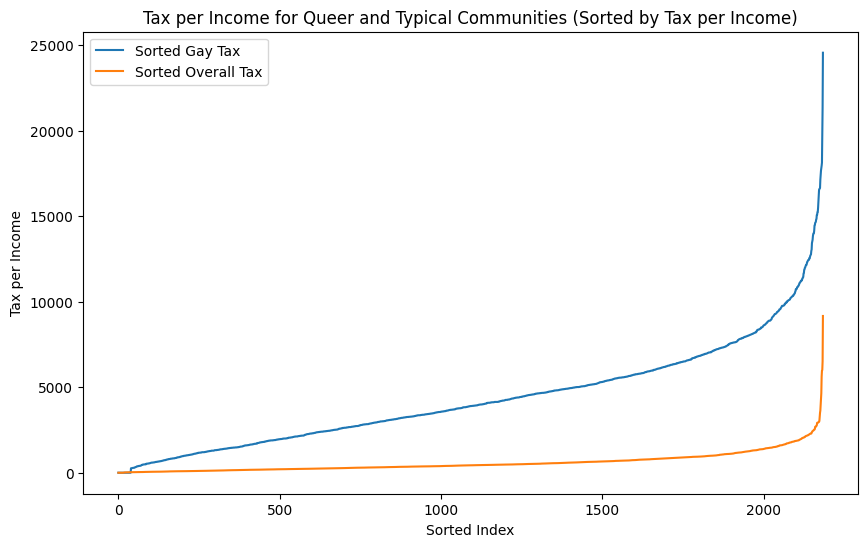

In [8]:
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=sorted_gaydf, x=range(len(sorted_gaydf)), y='gaytax per income', label='Sorted Gay Tax')
lineplot = sns.lineplot(data=sorted_gendf, x=range(len(sorted_gendf)), y='overalltax per income', label='Sorted Overall Tax')
lineplot.set(xlabel='Sorted Index', ylabel='Tax per Income', title='Tax per Income for Queer and Typical Communities (Sorted by Tax per Income)')
plt.legend();       plt.show()

with that established, lets try making a simple linear model

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ['zip', 'population', 'gay tax rate', 'overall tax paid', 'income', 'lat', 'long', 'gaytax per income', 'overalltax per income']

# Rename the columns to remove spaces
gaydf = gaydf.rename(columns={'overall tax paid': 'overall_tax_paid', 'gay tax rate': 'gay_tax_rate'})

lm1ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate', data=gaydf).fit()
lm2ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + lat + long', data=gaydf).fit()
lm3ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + population', data=gaydf).fit()

print(lm1ov.params)
print(lm2ov.params)
print(lm3ov.params)

Intercept       84.695506
gay_tax_rate     0.117061
dtype: float64
Intercept       893.208385
gay_tax_rate      0.117429
lat             -18.000063
long              1.378168
dtype: float64
Intercept      -59.912135
gay_tax_rate    -0.027664
population       0.029134
dtype: float64


In [10]:
lm1gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid', data=gaydf).fit()
lm2gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + lat + long', data=gaydf).fit()
lm3gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + population', data=gaydf).fit()

print(lm1gy.params)
print(lm2gy.params)
print(lm3gy.params)

Intercept           2651.732441
overall_tax_paid       2.886223
dtype: float64
Intercept          -1001.317225
overall_tax_paid       2.912113
lat                   45.851348
long                 -20.750909
dtype: float64
Intercept           507.065467
overall_tax_paid     -0.424010
population            0.154353
dtype: float64


considering the gay linear models follow the overall linear models - we can conclude the queer communities taxes follow the overall trend alot more then the vizualziations would elad you to think

other then that no meaningful correlation can be measured through lat/long - but this could be further investigated via comparing the CBD's of the metropolitan areas included in the data

for the next section I will add more data to try & improove the linar models above

In [11]:
cens1 = pd.read_csv("data/census20211.csv");# cens2 = pd.read_csv("data/census20212.csv"); cens3 = pd.read_csv("data/census20213.csv")

C:\Users\samia\AppData\Local\Temp\ipykernel_6480\2678940721.py:1: DtypeWarning: Columns (2,3,6,9,10,13,14,17,18,21,22,23,24,25,26,27,28,29,30,31,34,37,38,41,42,45,46,47,50,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,69,70,71,72,73,74,77,78,79,80,81,82,85,86,87,88,89,90,91,92,93,94,97,98,101,102,105,106,109,110,113,114,117,118,121,122,125,126,129,130,131,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,281,282,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,

In [12]:
cen1 = pd.DataFrame(cens1);# cen2 = cens2; cen2 = cens3

print(cen1.iloc[0])

# delete error things
for i in range(1, 90):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'MA']
    del cen1[column_name + 'EA']
    del cen1[column_name + 'M']
# delete unneded categories
for i in range(5, 18):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'E']
for i in range(19, 86):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'E']
for i in range(1, 90):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'PMA']
    del cen1[column_name + 'PEA']
    del cen1[column_name + 'PM']
    del cen1[column_name + 'PE']
columns_to_delete = ['DP05_0089E', 'DP05_0088E', 'Unnamed: 714']
cen1 = cen1.drop(columns=columns_to_delete)
del cen1['NAME']

cen1.head(5)

GEO_ID                                                  Geography
NAME                                         Geographic Area Name
DP05_0001E                Estimate!!SEX AND AGE!!Total population
DP05_0001EA     Annotation of Estimate!!SEX AND AGE!!Total pop...
DP05_0001M         Margin of Error!!SEX AND AGE!!Total population
                                      ...                        
DP05_0089PE     Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...
DP05_0089PM     Percent Margin of Error!!CITIZEN, VOTING AGE P...
DP05_0089PMA    Annotation of Percent Margin of Error!!CITIZEN...
DP05_0089PEA    Annotation of Percent!!CITIZEN, VOTING AGE POP...
Unnamed: 714                                                  NaN
Name: 0, Length: 715, dtype: object


,GEO_ID,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0018E,DP05_0086E,DP05_0087E
0,Geography,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex r...,Estimate!!SEX AND AGE!!Total population!!Media...,Estimate!!Total housing units,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi..."
1,0500000US01001,58239,28206,30033,93.9,38.5,24170,43906
2,0500000US01003,227131,110781,116350,95.2,43.4,121763,174686
3,0500000US01005,25259,13361,11898,112.3,40.2,11667,19623
4,0500000US01007,22412,12300,10112,121.6,39.7,9013,17682


In [13]:
new_column_names = {
    'GEO_ID': 'Zip',
    'DP05_0001E': 'total_pop',
    'DP05_0002E': 'total_male',
    'DP05_0003E': 'total_female',
    'DP05_0004E': 'sex_ratio',
    'DP05_0018E': 'median_age',
    'DP05_0086E': 'num_homes',
    'DP05_0087E': 'total_voters',
}

cen1 = cen1.rename(columns=new_column_names)

df1 = pd.DataFrame(cen1.drop(cen1.index[0]))

df1['Zip'] = df1['Zip'].apply(lambda x: x[-5:])

df1.head(5)

,Zip,total_pop,total_male,total_female,sex_ratio,median_age,num_homes,total_voters
1,01001,58239,28206,30033,93.9,38.5,24170,43906
2,01003,227131,110781,116350,95.2,43.4,121763,174686
3,01005,25259,13361,11898,112.3,40.2,11667,19623
4,01007,22412,12300,10112,121.6,39.7,9013,17682
5,01009,58884,29530,29354,100.6,41.1,24527,43633


In [14]:
gaydf2 = pd.DataFrame(gaydf)

gaydf2['zip'] = gaydf2['zip'].astype(str)

gaydf2 = gaydf2.merge(df1, left_on="zip", right_on="Zip")

gaydf2.head(5)
# gaydf.head()

,zip,population,gay_tax_rate,overall_tax_paid,income,lat,long,gaytax per income,overalltax per income,Zip,total_pop,total_male,total_female,sex_ratio,median_age,num_homes,total_voters
0,10001,19710.0,2540,766.0,1,40.750633,-73.997177,2540.0,766.0,10001,180078,87135,92943,93.8,38.2,72211,134489
1,10003,39470.0,5550,1569.0,1,40.731829,-73.989181,5550.0,1569.0,10003,567769,276369,291400,94.8,38.8,232162,416771
2,10005,8600.0,1370,265.0,1,40.706027,-74.008835,1370.0,265.0,10005,234045,113715,120330,94.5,50.7,140731,182526
3,11001,26970.0,5780,394.0,1,40.723317,-73.704949,5780.0,394.0,11001,683154,325490,357664,91.0,34.3,344306,512337
4,19001,16520.0,3370,176.0,1,40.125912,-75.125442,3370.0,176.0,19001,7439,3762,3677,102.3,43.4,3591,5721


now lets see if we can use all of this fine data to make a better linear regression model to probe for better predictors on taxes paid

In [15]:
gaydf2.columns

Index(['zip', 'population', 'gay_tax_rate', 'overall_tax_paid', 'income',
       'lat', 'long', 'gaytax per income', 'overalltax per income', 'Zip',
       'total_pop', 'total_male', 'total_female', 'sex_ratio', 'median_age',
       'num_homes', 'total_voters'],
      dtype='object')

In [16]:
# Rename the columns to remove spaces
gaydf2 = gaydf2.rename(columns={'gaytax per income': 'gaytax per income', 'overalltax per income': 'overalltax per income', 'total pop':'total_pop', 'total male':'total_male', 'total female':'total_female', 'sex ratio':'sex_ratio', 'median age':'median_age', 'num homes':'num_homes', 'total voters':'total_voters'})

gaydf2['sex_ratio'] = pd.to_numeric(gaydf2['sex_ratio']);       gaydf2['median_age'] = pd.to_numeric(gaydf2['median_age']);     gaydf2['total_pop'] = pd.to_numeric(gaydf2['total_pop'])
gaydf2['total_male'] = pd.to_numeric(gaydf2['total_male']);       gaydf2['total_female'] = pd.to_numeric(gaydf2['total_female'])
gaydf2['total_voters'] = pd.to_numeric(gaydf2['total_voters']);       gaydf2['num_homes'] = pd.to_numeric(gaydf2['num_homes'])

lm1ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate', data=gaydf2).fit()
lm2ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop', data=gaydf2).fit()
lm3ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_male + total_female', data=gaydf2).fit()

print(lm1ov.params)
print("---------------")
print(lm2ov.params)
print("---------------")
print(lm3ov.params)


Intercept       109.357446
gay_tax_rate      0.111928
dtype: float64
---------------
Intercept       83.796276
gay_tax_rate     0.109398
total_pop        0.000661
dtype: float64
---------------
Intercept       41.340667
gay_tax_rate     0.109175
total_male       0.051849
total_female    -0.047543
dtype: float64


In [17]:
lm1gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid', data=gaydf2).fit()
lm2gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop', data=gaydf2).fit()
lm3gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_male + total_female', data=gaydf2).fit()

print(lm1gy.params)
print("---------------")
print(lm2gy.params)
print("---------------")
print(lm3gy.params)

Intercept           1817.461759
overall_tax_paid       3.340408
dtype: float64
---------------
Intercept           1843.013272
overall_tax_paid       3.385229
total_pop             -0.000921
dtype: float64
---------------
Intercept           1916.842958
overall_tax_paid       3.552513
total_male            -0.178355
total_female           0.165882
dtype: float64


for model 1, 2, & 3 no significant findings existed other then the previously established ratio between the 2 datasets - all that could be seen was statistical noise

In [18]:
lm4ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + sex_ratio', data=gaydf2).fit()
lm5ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_male + total_female + sex_ratio', data=gaydf2).fit()
lm6ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + median_age', data=gaydf2).fit()

print(lm4ov.params)
print("---------------")
print(lm5ov.params)
print("---------------")
print(lm6ov.params)

Intercept      -37.155361
gay_tax_rate     0.111725
sex_ratio        1.446399
dtype: float64
---------------
Intercept       37.210589
gay_tax_rate     0.109166
total_male       0.051805
total_female    -0.047500
sex_ratio        0.040863
dtype: float64
---------------
Intercept       156.128410
gay_tax_rate      0.111892
median_age       -1.126378
dtype: float64


In [19]:
lm4gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + sex_ratio', data=gaydf2).fit()
lm5gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_male + total_female + sex_ratio', data=gaydf2).fit()
lm6gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + median_age', data=gaydf2).fit()

print(lm4gy.params)
print("---------------")
print(lm5gy.params)
print("---------------")
print(lm6gy.params)

Intercept           1196.067368
overall_tax_paid       3.335392
sex_ratio              6.129518
dtype: float64
---------------
Intercept           80.079785
overall_tax_paid     3.539210
total_male          -0.197276
total_female         0.184333
sex_ratio           18.103528
dtype: float64
---------------
Intercept           2087.726586
overall_tax_paid       3.339283
median_age            -6.512743
dtype: float64


for models 4 & 6 no significant findings existed either - however the sex ratio had an unusually high touch on the queer dataset

In [20]:
lm7ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop + num_homes', data=gaydf2).fit()
lm8ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop + total_voters', data=gaydf2).fit()
lmXov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop + total_male + total_female + sex_ratio + median_age + num_homes + total_voters', data=gaydf2).fit()

print(lm7ov.params)
print("---------------")
print(lm8ov.params)
print("---------------")
print(lmXov.params)

Intercept       85.465115
gay_tax_rate     0.108809
total_pop        0.005309
num_homes       -0.010153
dtype: float64
---------------
Intercept       89.544105
gay_tax_rate     0.103315
total_pop       -0.026098
total_voters     0.036090
dtype: float64
---------------
Intercept       25.943645
gay_tax_rate     0.097955
total_pop       -0.023291
total_male       0.024381
total_female    -0.047672
sex_ratio        1.846973
median_age      -3.565007
num_homes       -0.015806
total_voters     0.059231
dtype: float64


In [21]:
lm7gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop + num_homes', data=gaydf2).fit()
lm8gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop + total_voters', data=gaydf2).fit()
lmXgy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop + total_male + total_female + sex_ratio + median_age + num_homes + total_voters', data=gaydf2).fit()

print(lm7gy.params)
print("---------------")
print(lm8gy.params)
print("---------------")
print(lmXgy.params)

Intercept           1817.275584
overall_tax_paid       3.444027
total_pop             -0.014151
num_homes              0.028790
dtype: float64
---------------
Intercept           1820.913294
overall_tax_paid       3.473586
total_pop              0.031477
total_voters          -0.043781
dtype: float64
---------------
Intercept           368.008159
overall_tax_paid      3.798534
total_pop             0.040876
total_male           -0.177769
total_female          0.218645
sex_ratio            15.304015
median_age           -1.636478
num_homes             0.018555
total_voters         -0.103524
dtype: float64


once again, the only notable part going on is sex ratio holding an unusually big impact on the queer dataset with insignificiant impact on the overall

this could suggest sampling biased to/against one of the genders in the original gayborhoods dataset, or could still be statistical noise

alternatively, this could suggest gay male couples hold more financial success then lesbian couples (as a higher m/f indicates more taxes & likely more income), however I haven't been able to confirm or deny this via researching reputable journals on the topic